In [198]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
img=cv2.imread('DATA/PT24.jpg')
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    new_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

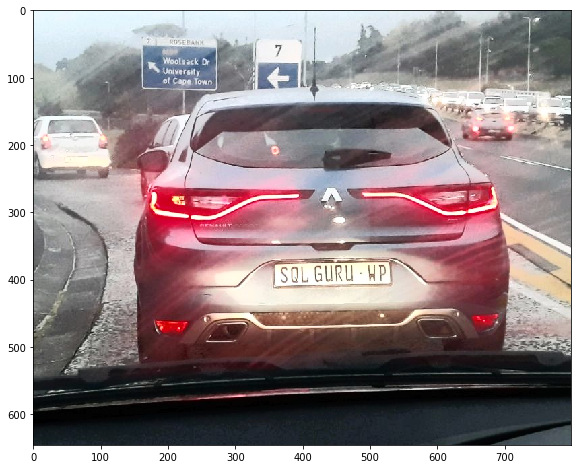

In [200]:
#img = cv2.bilateralFilter(img,3,75,75)
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
img=hist_equalization_result
display(img)

In [201]:
plate_cascade=cv2.CascadeClassifier('DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [202]:
def detect_plate(img):
    plate_img=img.copy()
    
    plate_rects=plate_cascade.detectMultiScale(plate_img,scaleFactor=1.35,minNeighbors=3)
    
    for(x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255),4)
    return plate_img

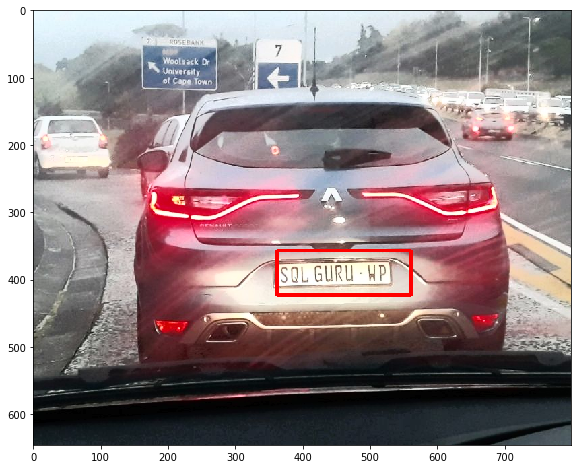

In [203]:
result=detect_plate(img)
display(result)

In [228]:
kernel_sharp = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#im = cv2.filter2D(im, -1, kernel)
def detect_and_filter_plate(img):
    global kernel_sharp
    plate_img=img.copy()
    roi=img.copy()
    
    plate_rects=plate_cascade.detectMultiScale(plate_img,scaleFactor=1.35,minNeighbors=3)
    
    for(x,y,w,h) in plate_rects:
        roi=roi[y:y+h,x:x+w]
        #sharpen_roi=cv2.filter2D(roi,-1,kernel_sharp)
        blurred_roi=cv2.GaussianBlur(roi,(25,25),0)
        plate_img[y:y+h,x:x+w]=blurred_roi
    return plate_img

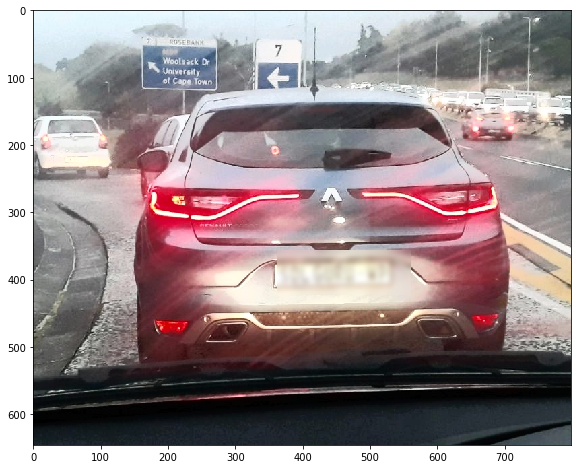

In [229]:
result2=detect_and_filter_plate(img)
display(result2)